In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("prep.csv")
dataset=pd.get_dummies(dataset,drop_first=True)

In [3]:
x_indep=dataset.drop('classification_yes',axis=1)
y_dep=dataset['classification_yes']

In [4]:
def split_preprocess_PCA(x_indep,y_dep):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x_indep,y_dep,test_size=0.25,random_state=0)
    
    from sklearn.preprocessing import StandardScaler
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.transform(x_test)
    
    from sklearn.decomposition import PCA
    pca=PCA(n_components=2)
    x_train=pca.fit_transform(x_train)
    x_test=pca.transform(x_test)
    return x_train,x_test,y_train,y_test


In [5]:
def cm_prediction(classifier,x_test,y_test):
    y_pred=classifier.predict(x_test)
    from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
    cm=confusion_matrix(y_test,y_pred)
    acscore=accuracy_score(y_test,y_pred)
    creport=classification_report(y_test,y_pred)
    print(cm)
    print(acscore)
    print(creport)

In [6]:
def logistic(x_train,x_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression(random_state=0)
    classifier.fit(x_train,y_train)
    
    cm_prediction(classifier,x_test,y_test)
    return classifier

def svm_linear(x_train,x_test,y_train,y_test):
    from sklearn.svm import SVC
    classifier=SVC(kernel='linear', random_state=0)
    classifier.fit(x_train,y_train)
    
    cm_prediction(classifier,x_test,y_test)
    return classifier

def svm_NL(x_train,x_test,y_train,y_test):
    from sklearn.svm import SVC
    classifier=SVC(kernel='rbf', random_state=0)
    classifier.fit(x_train,y_train)
    cm_prediction(classifier,x_test,y_test)
    return classifier

def Navie(x_train,x_test,y_train,y_test):
    from sklearn.naive_bayes import GaussianNB
    classifier=GaussianNB()
    classifier.fit(x_train,y_train)
    cm_prediction(classifier,x_test,y_test)
    return classifier

def knn(x_train,x_test,y_train,y_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    cm_prediction(classifier,x_test,y_test)
    return classifier


def decision(x_train,x_test,y_train,y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
    classifier.fit(x_train,y_train)
    cm_prediction(classifier,x_test,y_test)
    return classifier

def random(x_train,x_test,y_train,y_test):
    from sklearn.ensemble import RandomForestClassifier
    classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    classifier.fit(x_train,y_train)
    cm_prediction(classifier,x_test,y_test)
    return classifier

In [7]:
def plotPCATraining(classifier,x_train,y_train):
    from matplotlib.colors import ListedColormap
    import numpy as np
    import matplotlib.pyplot as plt
    X_set, y_set = x_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('Training set')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

def plotPCATest(classifier,x_test,y_test):
    from matplotlib.colors import ListedColormap
    import numpy as np
    import matplotlib.pyplot as plt
    X_set, y_set = x_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('Test set')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

[[36  0]
 [ 1 63]]
0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.98      0.99        64

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


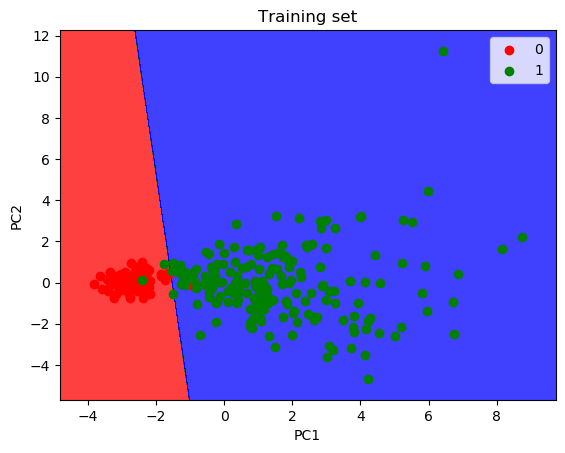

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


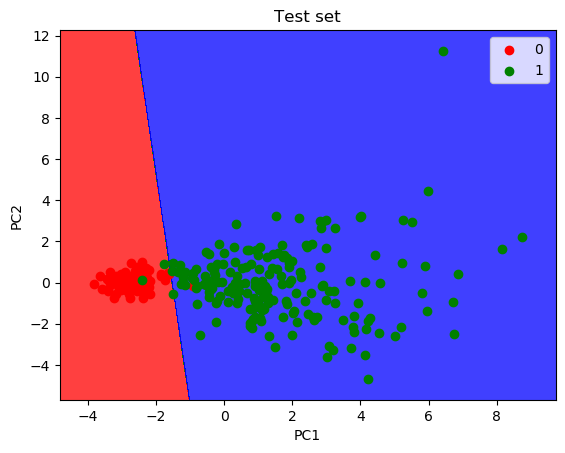

In [9]:
x_train,x_test,y_train,y_test=split_preprocess_PCA(x_indep,y_dep)

classifier=logistic(x_train,x_test,y_train,y_test)
#classifier=svm_linear(x_train,x_test,y_train,y_test)
#classifier=svm_NL(x_train,x_test,y_train,y_test)
#classifier=Navie(x_train,x_test,y_train,y_test)
#classifier=knn(x_train,x_test,y_train,y_test)
#classifier=decision(x_train,x_test,y_train,y_test)
#classifier=random(x_train,x_test,y_train,y_test)

plotPCATraining(classifier,x_train,y_train)
plotPCATest(classifier,x_train,y_train)